# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results 

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm



df = pd.read_csv('mental_music_cleaned.csv')
df.head()

,Unnamed: 0,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Latin,Yes,Yes,156.0,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,Rock,Yes,No,119.0,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,Video game music,No,Yes,132.0,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,R&B,Yes,No,107.0,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

/Users/dbrazier/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


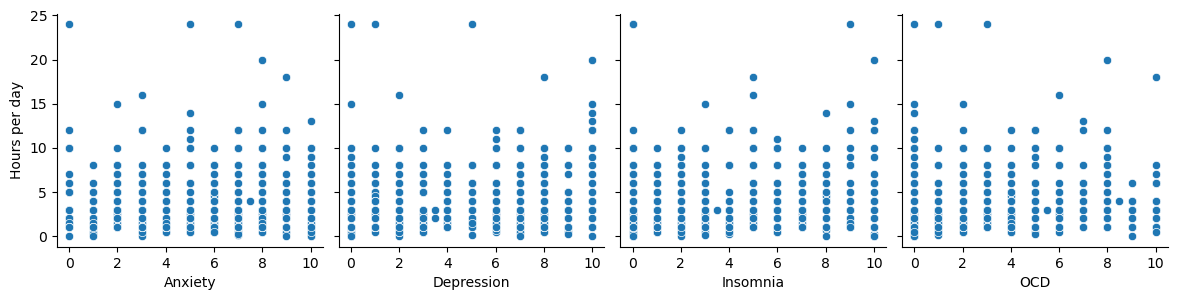

In [21]:
#want to compare mental health conditions to music hours listened per day
sns.pairplot(df, x_vars=['Anxiety', 'Depression','Insomnia', 'OCD'], 
             y_vars='Hours per day', size=3, aspect=1, kind='scatter')
plt.show()

/Users/dbrazier/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


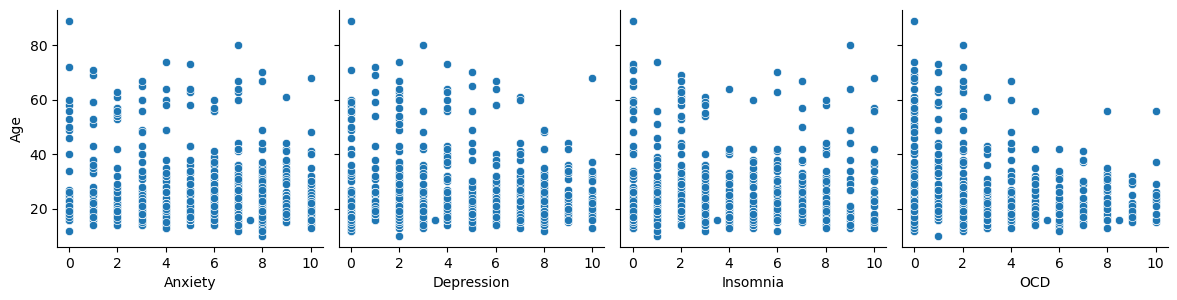

In [22]:
#want to compare ages to mental health conditions
sns.pairplot(df, x_vars=['Anxiety', 'Depression','Insomnia', 'OCD'], 
             y_vars='Age', size=3, aspect=1, kind='scatter')
plt.show()

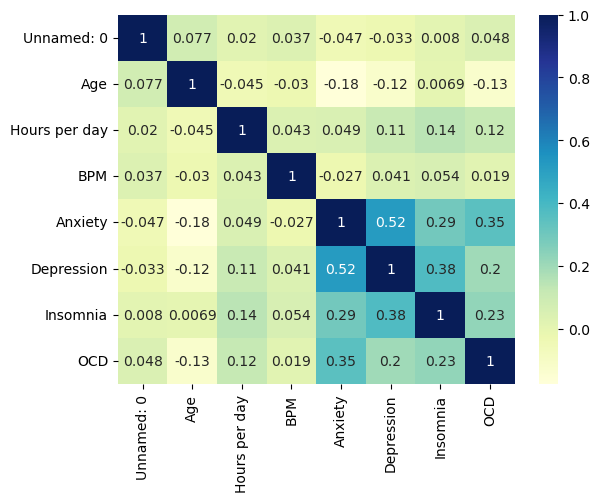

In [23]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [24]:
#to create the x and y variables
X = df['Anxiety'] 
y = df['Depression']

#to split the variables (test and train)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

#add a constant to get an intercept                  
X_train_sm = sm.add_constant(X_train)

#use 'OLS' to fit the regression line 
lr = sm.OLS(y_train, X_train_sm).fit()

#to see the parameters
lr.params

#use a summary to see all parameters
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Depression   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     200.9
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.03e-38
Time:                        13:12:41   Log-Likelihood:                -1212.8
No. Observations:                 515   AIC:                             2430.
Df Residuals:                     513   BIC:                             2438.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4102      0.261      5.405      0.000       0.898       1.923
Anxiety        0.5681      0.040     14.173      0.000       0.489       0.647
==============================================================================
Omnibus:                        0.502   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.778   Jarque-Bera (JB):                0.609
Skew:                           0.017   Prob(JB):                        0.737
Kurtosis:                       2.835   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

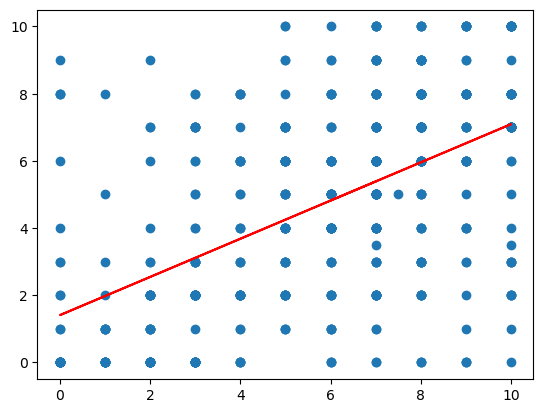

In [25]:
#make a visual of the regression line 
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.4102 + 0.5681*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

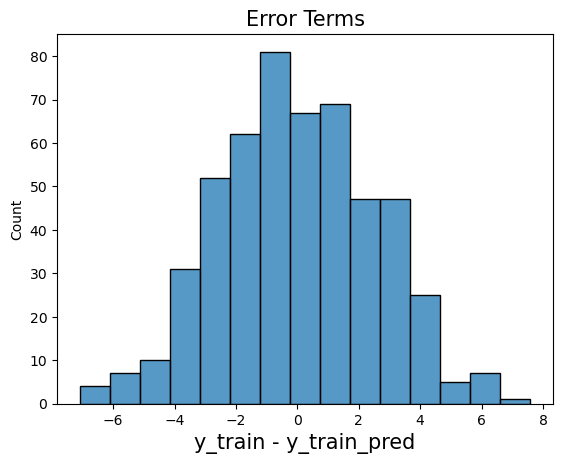

In [26]:
#predict the y value using the x_train variable
y_train_pred = lr.predict(X_train_sm)

#create residual with the y_train variable and the predicted y_train variable
res = (y_train - y_train_pred)

#histogram using the residual values
fig = plt.figure()
sns.histplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

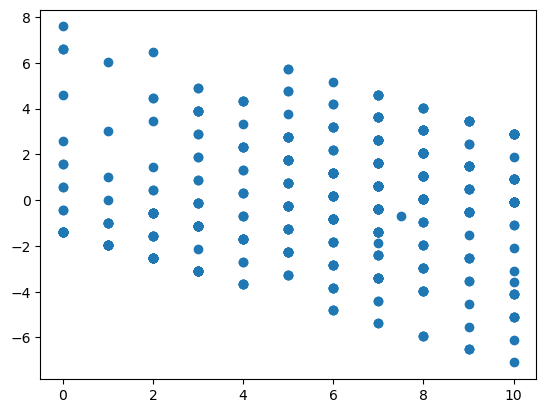

In [27]:
#checking for patterns in the residual data 
plt.scatter(X_train,res)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.281
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? The scatter plot model was not the best since the data had high variance although I was able to spot a negative pattern with the residual data. Overall however, the linear regression was not very effective in the main data analysis.
3. Was your plot of the error terms a bell curve? Yes